In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from data_process import rolling_split
import matplotlib.pyplot as plt
import seaborn

return_test_day = [1,3,5]
prediction_parameters_dic = {"Forecast period":1, "time_rolling_window":22}


df_Macro = pd.read_csv("./Data/EURUSD_Macro.csv")
df_Macro["Last_Return"] =((df_Macro["PX_LAST"].pct_change(periods=prediction_parameters_dic["Forecast period"]))
                          )

df_Macro["Predict_Return"] = ((df_Macro["PX_LAST"].pct_change(periods=prediction_parameters_dic["Forecast period"])
                      .dropna(ignore_index = True)))

df_Macro.dropna(inplace=True)
df_Macro

,Dates,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,DXY Curncy,GOLDS Comdty,USGG2YR Index,USGG5YR Index,USGG10YR Index,...,CAC Index,DAX Index,EURUSD 1M 25DC,EURUSD 1M 25DP,EURUSDV1M ATM,EURUSDV1W ATM,EUR1M Curncy,EUR12M Curncy,Last_Return,Predict_Return
1,1/3/2003,1.0358,1.0437,1.0342,1.0428,102.470,351.25,1.7499,2.9682,4.0169,...,3187.88,3092.94,10.07,10.07,10.0000,10.1500,-13.80,-122.00,0.006369,0.002685
2,1/6/2003,1.0420,1.0491,1.0416,1.0456,101.970,351.25,1.7983,3.0239,4.0518,...,3210.27,3157.25,10.40,10.39,10.3250,9.7000,-14.25,-120.50,0.002685,-0.004495
3,1/7/2003,1.0450,1.0456,1.0401,1.0409,102.570,347.25,1.7418,2.9751,4.0053,...,3160.99,3112.77,9.87,9.87,9.8000,9.3000,-13.75,-120.80,-0.004495,0.008646
4,1/8/2003,1.0405,1.0534,1.0363,1.0499,101.870,353.63,1.7257,2.9995,4.0169,...,3094.09,2993.00,9.92,9.92,9.8500,9.6250,-14.20,-120.65,0.008646,-0.001333
5,1/9/2003,1.0500,1.0538,1.0463,1.0485,101.940,352.75,1.8552,3.1747,4.1790,...,3152.29,3037.68,9.79,9.79,9.7250,9.9500,-13.84,-119.30,-0.001333,0.008679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,6/18/2024,1.0734,1.0761,1.0710,1.0740,105.256,2329.46,4.7120,4.2431,4.2227,...,7628.80,18131.97,6.68,8.20,7.2575,5.4950,16.09,188.07,0.000559,0.000372
5599,6/19/2024,1.0740,1.0753,1.0725,1.0744,105.254,2328.16,4.7120,4.2431,4.2227,...,7570.20,18067.91,6.50,7.97,7.0575,5.1975,15.62,188.63,0.000372,-0.003909
5600,6/20/2024,1.0745,1.0749,1.0702,1.0702,105.588,2360.09,4.7372,4.2746,4.2594,...,7671.34,18254.18,6.32,7.75,6.8575,5.2975,15.10,188.94,-0.003909,-0.000841
5601,6/21/2024,1.0702,1.0721,1.0671,1.0693,105.796,2321.98,4.7322,4.2742,4.2554,...,7628.57,18163.52,6.27,7.66,6.8200,5.2600,15.23,190.69,-0.000841,0.003741


In [7]:
print(*[7])

7


In [2]:
df_Macro.columns

Index(['Dates', 'PX_OPEN', 'PX_HIGH', 'PX_LOW', 'PX_LAST', 'DXY Curncy',
       'GOLDS Comdty', 'USGG2YR Index', 'USGG5YR Index', 'USGG10YR Index',
       'USGG30YR Index', 'GTEUR10Y Govt', 'GTEUR30Y Govt', 'FEDL01 Index',
       'SPX Index', 'SX5E Index', 'UKX Index', 'CAC Index', 'DAX Index',
       'EURUSD 1M 25DC', 'EURUSD 1M 25DP', 'EURUSDV1M ATM', 'EURUSDV1W ATM',
       'EUR1M Curncy', 'EUR12M Curncy', 'Last_Return', 'Predict_Return'],
      dtype='object')

In [2]:
split_point = int(df_Macro.shape[0]*0.9)
df_train = df_Macro.iloc[:split_point,:]
df_test = df_Macro.iloc[split_point:,:]

x_train = df_train.drop(columns=["Dates","Predict_Return"]).to_numpy()
y_train = df_train.loc[:, "Predict_Return"].to_numpy()

x_test = df_test.drop(columns=["Dates","Predict_Return"]).to_numpy()
y_test = df_test.loc[:, "Predict_Return"].to_numpy()

scale_x = StandardScaler()

x_train_norm = scale_x.fit_transform(x_train)
x_test_norm = scale_x.transform(x_test)

time_delta = prediction_parameters_dic["time_rolling_window"]
x_train_norm_rolling,x_test_norm_rolling = rolling_split(x_train_norm,time_delta),rolling_split(x_test_norm,time_delta)
y_train_rolling,y_test_rolling = y_train[time_delta-1:,...],y_test[time_delta-1:,...]

from data_process import splitting_entropy,threshold_search

threshold = threshold_search(y_train,1e-6)

print(threshold)

threshold = 0.002

0.001949


In [3]:
from data_process import labelize

y_train_rolling_label , y_test_rolling_label  = labelize(y_train_rolling,threshold),labelize(y_test_rolling,threshold) 

train_set = torch.utils.data.TensorDataset(torch.from_numpy(x_train_norm_rolling),torch.from_numpy(y_train_rolling_label).to(torch.int64))

test_set = torch.utils.data.TensorDataset(torch.from_numpy(x_test_norm_rolling),torch.from_numpy(y_test_rolling_label).to(torch.int64))

train_loader = torch.utils.data.DataLoader(train_set,batch_size=32,shuffle=True)

real_results = test_set[:][1]

print(len(real_results[real_results==0]))
print(len(real_results[real_results==1]))
print(len(real_results[real_results==2]))

164
206
170


In [4]:
import time_net

hyperparas = {'input_dim':x_train.shape[-1],'hidden_dim':32,'hidden_nums':5,'output_dim':3,'block_layer_nums':2, 'LSTM_layer_nums':1
        , 'dropout_rate':0}

net_test = time_net.LSTM_Net(hyperparas=hyperparas)

device = torch.device('cuda')

net_test.to(device=device,dtype=torch.float64)
loss = nn.CrossEntropyLoss()


def train_epoch(loss_function, optimizer, model, loader,train_data,test_data):
  loss_train_ls = []
  loss_test_ls = []
  
  for(i, (x, y)) in enumerate(loader):
    # Clear the gradients
    optimizer.zero_grad()
    
    x=x.to(device=device)
    y=y.to(device=device)
    # Run a forward pass
    outputs = model.forward(x)
    # Compute the batch loss
    loss = loss_function(outputs,y)
    # Calculate the gradients
    loss.backward()
    # Update the parameteres
    optimizer.step()

    if i%10 == 0:
      print(f"Batch: {i},train loss is: {loss}")
      with torch.no_grad():
        train_outputs = model.forward(train_data[:][0].to(device=device))
        train_loss = loss_function(train_outputs,train_data[:][1].to(device=device))
        loss_train_ls.append(train_loss.detach().cpu())
        
        test_outputs = model.forward(test_data[:][0].to(device=device))
        test_loss = loss_function(test_outputs,test_data[:][1].to(device=device))
        loss_test_ls.append(test_loss.detach().cpu())
        
        
        
        print(f"test loss is {test_loss}")
        
  return [loss_train_ls, loss_test_ls]   



def train_model(loss_function, optimizer, model, loader,train_data,test_data,epochs=25):
  loss_ls = []
  
  for i in range(epochs):
    print(f"-----------------------Epoch: {i}----------------------------------")

    loss_ls.append(train_epoch(loss_function, optimizer, model, loader,train_data,test_data))
    
  return loss_ls

In [5]:
optim_Adam = torch.optim.Adam(net_test.parameters(),lr = 0.001)
epochs = 5
loss_ls = train_model(loss_function=loss,optimizer=optim_Adam,model=net_test,loader=train_loader,train_data=train_set,
                      test_data=test_set,epochs=epochs)

-----------------------Epoch: 0----------------------------------
Batch: 0,train loss is: 1.2423042890578953
test loss is 1.26613235872425
Batch: 10,train loss is: 1.200143140917169
test loss is 1.0967425485940934
Batch: 20,train loss is: 1.1497709455269134
test loss is 1.1495901653291065
Batch: 30,train loss is: 1.0775486687555884
test loss is 1.1129939417548502
Batch: 40,train loss is: 0.9438536078865853
test loss is 1.1014813460300525
Batch: 50,train loss is: 1.1206186152083992
test loss is 1.1298920227452067
Batch: 60,train loss is: 0.964589490002828
test loss is 1.1445140935002782
Batch: 70,train loss is: 1.1174937439479748
test loss is 1.1014103132670896
Batch: 80,train loss is: 1.1308536828021567
test loss is 1.127949080656196
Batch: 90,train loss is: 1.1434688170937122
test loss is 1.1577669427271966
Batch: 100,train loss is: 1.1076305374201905
test loss is 1.1014427936929592
Batch: 110,train loss is: 1.068420486707872
test loss is 1.101774989304125
Batch: 120,train loss is: 1.

In [6]:
loss_array_1 = np.array(loss_ls).reshape((2,epochs,-1)).reshape((2,-1))

for param_group in optim_Adam.param_groups:
    param_group['lr'] = 0.0001
epochs = 20
loss_ls = train_model(loss_function=loss,optimizer=optim_Adam,model=net_test,loader=train_loader,train_data=train_set,
                      test_data=test_set,epochs=epochs)

-----------------------Epoch: 0----------------------------------
Batch: 0,train loss is: 1.0734563912161417
test loss is 1.0874661042049234
Batch: 10,train loss is: 1.0820322945571623
test loss is 1.0827179833616347
Batch: 20,train loss is: 1.0311487215423676
test loss is 1.0793929869039296
Batch: 30,train loss is: 1.0813456934422416
test loss is 1.0796099996463804
Batch: 40,train loss is: 1.1057190435638722
test loss is 1.0784836172388468
Batch: 50,train loss is: 1.1064639320077059
test loss is 1.0786308257554613
Batch: 60,train loss is: 1.1108912631116763
test loss is 1.0795501518287487
Batch: 70,train loss is: 1.0975363643750558
test loss is 1.0799497629338626
Batch: 80,train loss is: 0.9910910737239204
test loss is 1.0798005722049167
Batch: 90,train loss is: 1.2613708274615607
test loss is 1.0789374057399383
Batch: 100,train loss is: 0.9828333119027186
test loss is 1.0782798391305237
Batch: 110,train loss is: 1.0828681967566816
test loss is 1.0784978024730683
Batch: 120,train loss

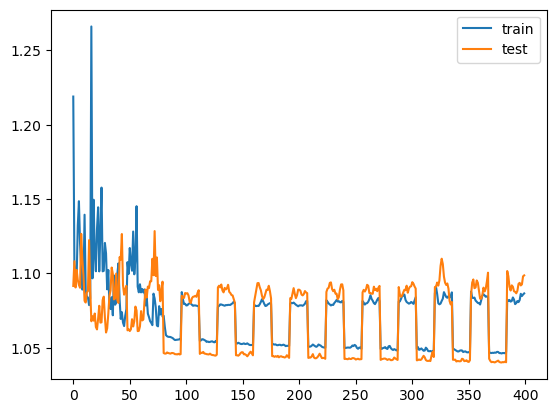

In [7]:
loss_array_2 = np.array(loss_ls).reshape((2,epochs,-1)).reshape((2,-1))

loss_array = np.concatenate((loss_array_1,loss_array_2),axis=-1)

plt.plot(loss_array[0],label = "train")
plt.plot(loss_array[1],label= "test")
plt.legend()
plt.show()

In [8]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

net_test.to(device=torch.device("cpu"))

predict_probability = torch.max(F.softmax(net_test(test_set[:][0]),dim=-1),dim=-1)[0]

predict_results = torch.argmax(F.softmax(net_test(test_set[:][0]),dim=-1),dim=-1)
real_results = test_set[:][1]

accuracy_score(real_results,predict_results)

0.40185185185185185

In [9]:
act_predict_bool = (predict_results != 1) & (predict_probability > 0.4)

act_predict_results = predict_results[act_predict_bool]
act_real_results = real_results[act_predict_bool]

accuracy_score(act_predict_results,act_real_results)


0.4

In [10]:
act_predict_results.shape


torch.Size([10])

In [11]:
# saved_path = "./trained_model/Mac_LSTM.pth"

# torch.save(net_test.state_dict(),saved_path )